# To extract Twitter's tweets

This script extracts all the tweets with hashtag #covid-19 related to the day before today (yesterday) and saves them into a .csv file.
We use the `tweepy` library, which can be installed with the command `pip install tweepy`. 


*   To get Twitter consumer key, consumer sceret, access token and acess sceret- you have to reguster on [Twitter developer web portal](https://developer.twitter.com/)
*   After that go to dash board page ( see below image)
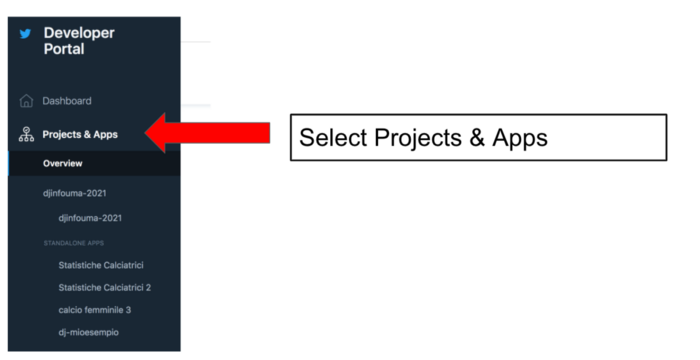
* Then, create a new project if you don't have project space (see screenshot)
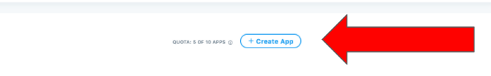


In [1]:
!pip install tweepy
import sys
import csv
import tweepy
import datetime

In [3]:
TWITTER_CONSUMER_KEY = 'vLcxeGYqPTm2De02u5Fa0c2Zs'
TWITTER_CONSUMER_SECRET = 'htu890Ysc8RCdN5eMkh25P6qDehVCbpAh0zNIKH8M55AK5RHqo'
TWITTER_ACCESS_TOKEN = '108051742-qVpGsVGEpCTf7B5xvbNs5jYHuHKaAwlpmqQQVjgq'
TWITTER_ACCESS_TOKEN_SECRET = 'goRE81O2jfuvtCGWWjspF7Fsibk3VUi2qApbJ3nZCb4l5'

We setup the connection to our Twitter App by using the `OAuthHandler()` class and its `access_token()` function. Then we call the Twitter API through the `API()` function.

In [4]:
auth = tweepy.OAuthHandler(TWITTER_CONSUMER_KEY, TWITTER_CONSUMER_SECRET)
auth.set_access_token(TWITTER_ACCESS_TOKEN, TWITTER_ACCESS_TOKEN_SECRET)
api = tweepy.API(auth,wait_on_rate_limit=True)

Now we setup dates. We need to setup today and yesterday.

In [5]:
today = datetime.date.today()
yesterday= today - datetime.timedelta(days=1)
today, yesterday

(datetime.date(2022, 1, 20), datetime.date(2022, 1, 19))

We search for tweets on Twitter by using the `Cursor()` function. 
We pass the `api.search` parameter to the cursor, as well as the query string, which is specified through the `q` parameter of the cursor.
The query string can receive many parameters, such as the following (not mandatory) ones:
* `from:` - to specify a specific Twitter user profile
* `since:` - to specify the beginning date of search
* `until:` - to specify the ending date of search
The cursor can also receive other parameters, such as the language and the `tweet_mode`. If `tweet_mode='extended'`, all the text of the tweet is returned, otherwise only the first 140 characters.

In [6]:
tweets_list = tweepy.Cursor(api.search, q="#Covid-19 since:" + str(yesterday)+ " until:" + str(today),tweet_mode='extended', lang='it').items()

In [7]:
tweets_list = tweepy.Cursor(api.search, q="from: elonmusk",tweet_mode='extended', lang='it').items()

Optionally, we can extract tweets from a given places, by specifying in the query string one of the following keywords, followed by `:`: 
* `place` - the place name or the place ID
* `place_country` - the country code. See [here](https://en.wikipedia.org/wiki/ISO_3166-1_alpha-2) to see the country code
* `point_radius` - the circular geographic area within which to search for
* `bounding_box` - the 4 sided geographic area, within which to search for.

For more details, you can read the full [Twitter Documentation](https://developer.twitter.com/en/docs/tutorials/filtering-tweets-by-location).

Here 

In [8]:
place = 'Italy'
tweets_list = tweepy.Cursor(api.search, q="place: " + place,tweet_mode='extended', lang='en').items()

Now we loop across the `tweets_list`, and, for each tweet, we extract the text, the creation date, the number of retweets and the favourite count. We store every tweet into a list, called `output`.

In [9]:
output = []
for tweet in tweets_list:
    text = tweet._json["full_text"]
    print(text)
    favourite_count = tweet.favorite_count
    retweet_count = tweet.retweet_count
    created_at = tweet.created_at
    
    line = {'text' : text, 'favourite_count' : favourite_count, 'retweet_count' : retweet_count, 'created_at' : created_at}
    output.append(line)

Streaming output truncated to the last 5000 lines.
🇬🇧 0.12% *BELOW* EU average 🇪🇺

4 largest:
SPAIN🇪🇸 ITA…
RT @Dan_Lorti: Antico Forno Roscioli in Rome. Always a great place to grab a slice of pizza!
#italy #rome #travel #foodies #pizza https://t…
@CecilyToronto Did I tell you I'm going to Italy for sabbatical? Gonna learn more about honeybees, bumblebees, ancestral variaties of some of our crops. It will be amazing. We are buying a place in Northern Italy near the Antonio Canova museum
🚨🚨 It's possible that Shaqiri 🇨🇭 will leave Lyon in this transfer window. Talks with several clubs from England, Germany and Italy have taken place but there is no offer so far.
➡A move to the MLS is also possible.
RT @almostoneword: @BorisJohnson 'FULLY VACCINATED' stats:

UK *DROPS* to 15th place
🇬🇧 0.12% *BELOW* EU average 🇪🇺

4 largest:
SPAIN🇪🇸 ITA…
RT @almostoneword: @BorisJohnson 'FULLY VACCINATED' stats:

UK *DROPS* to 15th place
🇬🇧 0.12% *BELOW* EU average 🇪🇺

4 largest:
SPAIN🇪🇸 ITA…
RT @almosto

In [10]:
output

[{'created_at': datetime.datetime(2022, 1, 20, 8, 2, 35),
  'favourite_count': 0,
  'retweet_count': 74,
  'text': 'RT @FilmUpdates: The second season of #TheWhiteLotus will reportedly take place in Italy. \n\n(https://t.co/FjdakGok5X) https://t.co/IEcsONT3…'},
 {'created_at': datetime.datetime(2022, 1, 20, 7, 59, 12),
  'favourite_count': 0,
  'retweet_count': 1,
  'text': 'RT @insidethegames: The second and third #European qualifying groups were scheduled to take place in #Łochów in #Poland and #LignanoSabbiad…'},
 {'created_at': datetime.datetime(2022, 1, 20, 7, 35, 38),
  'favourite_count': 0,
  'retweet_count': 0,
  'text': 'Tuscany\nAre you want to know where to find this place?\n\nWrite me\n\n#NFT #LikeForLikes #Italy #placeinthesun #Paradise #SundayFunday #LoveIsInTheAir https://t.co/ovHiXS0o5l'},
 {'created_at': datetime.datetime(2022, 1, 20, 7, 30, 22),
  'favourite_count': 0,
  'retweet_count': 0,
  'text': '@MobilePunch But u oloriburuku/theives lots can carry our money giv

Finally, we convert the `output` list to a `pandas DataFrame` and we store results.

In [11]:
output

[{'created_at': datetime.datetime(2022, 1, 20, 8, 2, 35),
  'favourite_count': 0,
  'retweet_count': 74,
  'text': 'RT @FilmUpdates: The second season of #TheWhiteLotus will reportedly take place in Italy. \n\n(https://t.co/FjdakGok5X) https://t.co/IEcsONT3…'},
 {'created_at': datetime.datetime(2022, 1, 20, 7, 59, 12),
  'favourite_count': 0,
  'retweet_count': 1,
  'text': 'RT @insidethegames: The second and third #European qualifying groups were scheduled to take place in #Łochów in #Poland and #LignanoSabbiad…'},
 {'created_at': datetime.datetime(2022, 1, 20, 7, 35, 38),
  'favourite_count': 0,
  'retweet_count': 0,
  'text': 'Tuscany\nAre you want to know where to find this place?\n\nWrite me\n\n#NFT #LikeForLikes #Italy #placeinthesun #Paradise #SundayFunday #LoveIsInTheAir https://t.co/ovHiXS0o5l'},
 {'created_at': datetime.datetime(2022, 1, 20, 7, 30, 22),
  'favourite_count': 0,
  'retweet_count': 0,
  'text': '@MobilePunch But u oloriburuku/theives lots can carry our money giv

In [12]:
import pandas as pd

df = pd.DataFrame(output)
df.to_csv('output.csv', mode='a', header=False)
df.to_csv('output.csv')

In [13]:
df.shape

(2521, 4)

In [14]:
df.head(10)

,text,favourite_count,retweet_count,created_at
0,RT @FilmUpdates: The second season of #TheWhit...,0,74,2022-01-20 08:02:35
1,RT @insidethegames: The second and third #Euro...,0,1,2022-01-20 07:59:12
2,Tuscany\nAre you want to know where to find th...,0,0,2022-01-20 07:35:38
3,@MobilePunch But u oloriburuku/theives lots ca...,0,0,2022-01-20 07:30:22
4,RT @FilmUpdates: The second season of #TheWhit...,0,74,2022-01-20 07:22:00
5,@Valyriannnn Since Pep turned PL into a farm t...,1,0,2022-01-20 07:14:25
6,RT @FabrizioRomano: Nadiem Amiri is set to joi...,0,615,2022-01-20 07:05:50
7,"RT @est_living: 📍CALABRIA, ITALY | As a return...",0,1,2022-01-20 07:02:48
8,RT @FilmUpdates: The second season of #TheWhit...,0,74,2022-01-20 06:58:35
9,RT @FilmUpdates: The second season of #TheWhit...,0,74,2022-01-20 06:49:53
